#### Decorators
Decorators are a powerful and flexible feature in Python that allows you to modify the behavior of a function or class method. They are commonly used to add functionality to functions or methods without modifying their actual code. This lesson covers the basics of decorators, including how to create and use them.

In [2]:
word1= ["ab", "c"]
word2 = ["a", "bc"]

In [3]:
word1 = "".join(word1)

'abc'

In [ ]:
### function copy
### closures
### decorators

In [18]:
## function copy
def welcome():
    return "Welcome to the advanced python course"

welcome()

'Welcome to the advanced python course'

In [19]:
wel=welcome
print(wel())
del welcome
print(wel())

Welcome to the advanced python course
Welcome to the advanced python course


### closures functions
It's a method (function) inside another method, and the return type usually is the sub-method

In [1]:
##closures functions

def main_welcome(msg):
   
    def sub_welcome_method():
        print("Welcome to the advance python course")
        print(msg)
        print("Please learn these concepts properly")
    return sub_welcome_method()

In [2]:
main_welcome("Welcome everyone")

Welcome to the advance python course
Welcome everyone
Please learn these concepts properly


In [30]:
def main_welcome(func):
   
    def sub_welcome_method():
        print("Welcome to the advance python course")
        func("Welcome everyone to this tutorial")
        print("Please learn these concepts properly")
    return sub_welcome_method()

In [31]:
main_welcome(print)

Welcome to the advance python course
Welcome everyone to this tutorial
Please learn these concepts properly


In [36]:
def main_welcome(func,lst):
   
    def sub_welcome_method():
        print("Welcome to the advance python course")
        print(func(lst))
        print("Please learn these concepts properly")
    return sub_welcome_method()

In [37]:
main_welcome(len,[1,2,3,4,5])

Welcome to the advance python course
5
Please learn these concepts properly


In [34]:
len([1,2,3,4,5,6])

6

In [4]:
### Decorator
def main_welcome(func):
   
    def sub_welcome_method():
        print("Welcome to the advance python course")
        func()
        print("Please learn these concepts properly")
    return sub_welcome_method()

In [7]:
def main_welcome(func):
   
    print("Welcome to the advance python course")
    func()
    print("Please learn these concepts properly")


In [8]:
def coure_introduction():
    print("This is an advanced python course")

coure_introduction()

This is an advanced python course


In [9]:
main_welcome(coure_introduction)

Welcome to the advance python course
This is an advanced python course
Please learn these concepts properly


In [10]:
@main_welcome
def coure_introduction():
    print("This is an advanced python course")

Welcome to the advance python course
This is an advanced python course
Please learn these concepts properly


In [42]:
## Decorator

def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

In [43]:
@my_decorator
def say_hello():
    print("Hello!")



In [44]:
say_hello()

Something is happening before the function is called.
Hello!
Something is happening after the function is called.


In [11]:
## Decorators WWith arguments
def repeat(n):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for _ in range(n):
                func(*args, **kwargs)
        return wrapper
    return decorator

In [12]:
@repeat(3)
def say_hello():
    print("Hello")

In [13]:
say_hello()

Hello
Hello
Hello


#### Conclusion
Decorators are a powerful tool in Python for extending and modifying the behavior of functions and methods. They provide a clean and readable way to add functionality such as logging, timing, access control, and more without changing the original code. Understanding and using decorators effectively can significantly enhance your Python programming skills.

---

### Assignment 1: Custom Iterator

Create a custom iterator class named `Countdown` that takes a number and counts down to zero. Implement the `__iter__` and `__next__` methods. Test the iterator by using it in a for loop.

In [12]:
class Countdown:
    def __init__(self, num):
        self.num = num
    def __next__(self):
        if self.num ==0:
            raise StopIteration
        self.num -=1
        return self.num
    def __iter__(self): return self         ## this is the iterator object
    

In [13]:
i = Countdown(5)

In [17]:
lst = [i for i in Countdown(5)]

In [18]:
lst

[4, 3, 2, 1, 0]

### Assignment 2: Custom Iterable Class

Create a class named `MyRange` that mimics the behavior of the built-in `range` function. Implement the `__iter__` and `__next__` methods. Test the class by using it in a for loop.

In [13]:
class MyRange:
    def __init__(self,end_num):
        self.end_num = end_num
        self.current = 0
    
    def __iter__(self):
        return self
    def __next__(self):
        if self.current > self.end_num:
            raise StopIteration
        self.current +=1
        return self.current
    

In [14]:
ra = MyRange(5)

In [15]:
for i in ra:
    print(i)

1
2
3
4
5
6


### Assignment 3: Generator Function

Write a generator function named `fibonacci` that yields the Fibonacci sequence. Test the generator by iterating over it and printing the first 10 Fibonacci numbers.

In [34]:
def f(n):    #0,1,1,2,3     
    i = 0
    j = 1
    for _ in range(n):
        yield i
        i,j = j,i+j

In [41]:
gen = f(5)
next(gen)


0

In [44]:
next(gen)

2

Create a generator expression that generates the squares of numbers from 1 to 10. Iterate over the generator and print each value.

In [45]:
def square(n):
    for i in range(n):
        yield i**2
        

In [56]:
i = square(10)
next(i)

<generator object square at 0x0000014CF0B4D490>

In [53]:
next(i)

1

In [54]:
squares = (x * x for x in range(1, 11))
squares

<generator object <genexpr> at 0x0000014CF0B4CD40>

In [57]:
s = squares
next(s)

1

Write two generator functions: `even_numbers` that yields even numbers up to a limit, and `squares` that yields the square of each number from another generator. Chain these generators to produce the squares of even numbers up to 20.

In [63]:
def even_numbers(n):
    for i in range(n):
        if i%2 == 0:
            yield i

def squares(func):
    for i in func:
        yield i*i

In [66]:
e = even_numbers(10)
s = squares(e)
s

<generator object squares at 0x0000014CF02D3850>

In [65]:
e = even_numbers(10)
e

<generator object even_numbers at 0x0000014CF0B4FAC0>

Write a decorator named `time_it` that measures the execution time of a function. Apply this decorator to a function that calculates the factorial of a number.

In [80]:
import time
def calc_time(func):
    def wrapper(s):
        start = time.time()
        res = func(s)
        end = time.time()
        print(f"Time taken to execute the function is {end-start}")
        return res
    return wrapper


In [81]:
@calc_time
def fac(n):
    return 1 if n == 0 else n*fac(n-1)


In [84]:
fac(1)

Time taken to execute the function is 0.0
Time taken to execute the function is 0.0


1

In [85]:
import time

def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Execution time: {end_time - start_time} seconds")
        return result
    return wrapper

@time_it
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

# Test
print(factorial(10))

Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
Execution time: 0.0 seconds
3628800


In [86]:
import time

def calc_time(func):
    def wrapper(s, _first_call=[True]):
        if _first_call[0]:  # This is a hack to make sure the time is only calculated once
            start = time.time()
            _first_call[0] = False
            res = func(s)
            end = time.time()
            print(f"Time taken to execute the function is {end-start}")
            _first_call[0] = True
            return res
        else:
            return func(s)
    return wrapper

@calc_time
def fac(n):
    return 1 if n == 0 else n * fac(n - 1)

# Example usage:
print(fac(5))

Time taken to execute the function is 0.0
120


### 4
Create a generator expression that generates the squares of numbers from 1 to 10. Iterate over the generator and print each value.

In [1]:
s_n = (i**2 for i in range(1,11))

In [3]:
def iteration(generator):
    for i in generator:
        yield i

In [7]:
for i in iteration(s_n):
    print(i)

1
4
9
16
25
36
49
64
81
100


In [11]:
def log_iteration(generator_func):
    def wrapper(*args, **kwargs):
        generator = generator_func(*args, **kwargs)
        for value in generator:
            print(f"Yielding value: {value}")
            yield value
    return wrapper

@log_iteration
def simple_generator(n):
    for i in range(n):
        yield i

# Example usage:
for value in simple_generator(5):
    print(value)

Yielding value: 0
0
Yielding value: 1
1
Yielding value: 2
2
Yielding value: 3
3
Yielding value: 4
4


- The yield value statement in the log_iteration decorator is crucial because it allows the decorator to pass values from the wrapped generator function to the caller. Without yield value, the decorator would not produce any output, effectively breaking the generator functionality.

- You need to always put a return value for the decorator.

###  5: Chaining Generators

Write two generator functions: `even_numbers` that yields even numbers up to a limit, and `squares` that yields the square of each number from another generator. Chain these generators to produce the squares of even numbers up to 20.

In [17]:
def even_numbers(limit):
    for i in range(0,limit+1):
        yield i if i%2 == 0 else None

def squares(generator):
    for i in generator:
        yield i**2 if type(i) == int else None

num = squares(even_numbers(10))
lst = [i for i in num]
print(lst)

[0, None, 4, None, 16, None, 36, None, 64, None, 100]


###  6: Simple Decorator

Write a decorator named `time_it` that measures the execution time of a function. Apply this decorator to a function that calculates the factorial of a number.

In [41]:
import time 
def time_it(func):
    def wrapper(*args,_first_time=[True]):
        #time.
        if _first_time[0] == True:
            start = time.time()
            result = func(*args)     #calling the outside function
            end = time.time()
            _first_time[0] = False
            print(f"Time taken is {end-start}")
            return result            # return value for the sub_function
        else:
            return result
    return wrapper                # return the sub_function

@time_it                        #use the sign to use the decorator
def factorial (n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)
print(factorial(10))

In [42]:
@time_it                        #use the sign to use the decorator
def factorial (n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)
print(factorial(10))

Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
Time taken is 0.0
3628800


In [5]:
import time

def time_it(func):
    def wrapper(*args, _first_time=[True]):
        if _first_time[0]:
            start = time.time()
            _first_time[0] = False
            result = func(*args)
            end = time.time()
            _first_time[0] = True
            print(f"Time taken is {end - start}")
            return result
        else:
            return func(*args)
    return wrapper

@time_it
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

# Example usage:
print(factorial(10))

Time taken is 0.0
3628800


### Assignment 7: Decorator with Arguments

Write a decorator named `repeat` that takes an argument `n` and repeats the execution of the decorated function `n` times. Apply this decorator to a function that prints a message.

In [46]:
def repeat(func):
    def wrapper(n):
        for i in range(n):
            func()
    return wrapper
@repeat
def print_func():
    print("hi")

In [47]:
a = print_func(6)

hi
hi
hi
hi
hi
hi


### 8: Nested Decorators

Write two decorators: `uppercase` that converts the result of a function to uppercase, and `exclaim` that adds an exclamation mark to the result of a function. Apply both decorators to a function that returns a greeting message.

In [30]:
def transform (func):
    def uppercase():
        result = func()
        return result.upper()
    
    def exclaim ():
        result = uppercase()
        result+="!"
        return result
    
    return exclaim

In [31]:
@transform
def greeting():
    return "Welcome"

###  9: Class Decorator

Create a class decorator named `singleton` that ensures a class has only one instance. Apply this decorator to a class named `DatabaseConnection` and test it.

In [1]:
c = {"1":2}

In [4]:
if "1" in c:
    print("yes")

yes


In [18]:
class noMore(Exception):
    pass

def singleton(cls):
    cls_lst = {}
    def check(*args,**kargs):
        if cls not in cls_lst:
            cls_lst[cls] = 1
            return cls 
        if cls in cls_lst:
            raise noMore("You can't create more")
    return check

@singleton
class test:
    count = 0
    def __init__(self):
        test.count+= 1
        return test.count


In [19]:
a = test()

In [20]:
a = test()

noMore: You can't create more

### 10: Iterator Protocol with Decorators

Create a custom iterator class named `ReverseString` that iterates over a string in reverse. Write a decorator named `uppercase` that converts the string to uppercase before reversing it. Apply the decorator to the `ReverseString` class.

In [67]:
def uppercase(cls):
    #ans = ""
    def wrraper(string):
        ins = cls(string)
        ans = ""
        for i in ins:
            ans += i.upper()
        return ans
    return wrraper
@uppercase
class ReverseString:
    
    def __init__(self,string):
        self.str = string
        self.len = len(string)-1 
        self.reverse = ""
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.len < 0:
            raise StopIteration
        else:
            self.reverse =  self.str[self.len]
            self.len -=1
            return self.reverse


In [68]:
a=ReverseString("momo")

In [69]:
am = [i for i in a]
am

['O', 'M', 'O', 'M']

###  11: Stateful Generators

Write a stateful generator function named `counter` that takes a start value and increments it by 1 each time it is called. Test the generator by iterating over it and printing the first 10 values.

In [70]:
def counter(start):
    current = start 
    while True:
        yield current
        current +=1
a = counter(0)
for _ in range(10):
    print(next(a))

0
1
2
3
4
5
6
7
8
9


###  12: Generator with Exception Handling

Write a generator function named `safe_divide` that takes a list of numbers and yields the division of each number by a given divisor. Implement exception handling within the generator to handle division by zero.

In [74]:
def safe_divide(lst,divisor):
    for i in lst:
        try:
            yield i/divisor
        except ZeroDivisionError:
            print("This divisor isn't safe")
a = [i for i in safe_divide([0,1,2,3],3)]

In [75]:
a

[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

In [76]:
a = [i for i in safe_divide([0,1,2,3],0)]

This divisor isn't safe
This divisor isn't safe
This divisor isn't safe
This divisor isn't safe


### 13: Context Manager Decorator

Write a decorator named `open_file` that manages the opening and closing of a file. Apply this decorator to a function that writes some text to a file.

In [77]:
def open_file(file_path):
    def wrapper():
        with open(file_path,'w') as f:
            f.write("fiengr")
            f.close()
        return f
    return wrapper            


In [78]:
a = open_file("large_file.txt")

In [80]:
# the error is that I need to pass a function to the decorator "open_file"
a

<function __main__.open_file.<locals>.wrapper()>

### 15: Generator Pipeline

Write three generator functions: `integers` that yields integers from 1 to 10, `doubles` that yields each integer doubled, and `negatives` that yields the negative of each doubled value. Chain these generators to create a pipeline that produces the negative doubled values of integers from 1 to 10.

In [81]:
def integers(num):
    for i in range(num):
        yield i
def doubles(generator):
    for i in generator:
        yield i*i
def negatives(generator):
    for i in generator:
        yield -i
    

In [84]:
a = [i for i in negatives(doubles(integers(10)))]
a

[0, -1, -4, -9, -16, -25, -36, -49, -64, -81]

to create a decorators, you need to create:
1. Function inside another function
2. call a function inside that decorator
3. return a value from sub_function
4. return the sub_function itself
3. use @ TO can use that decorator in the function you created
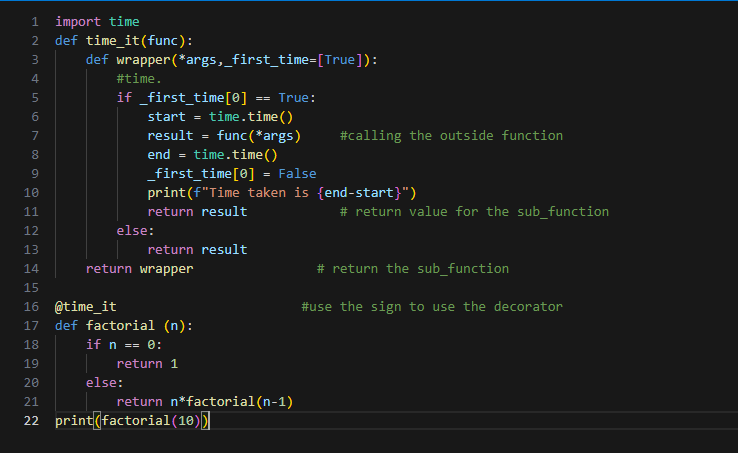